In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from warnings import simplefilter
import statistics
import warnings
warnings.filterwarnings("ignore")

In [97]:
df = pd.read_excel('Califonia_housing.xlsx')

In [98]:
df.shape

(20640, 10)

In [99]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [100]:
df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [102]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

**HANDLING MISSING DATA**

In [103]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].value_counts().index[0])
df['total_bedrooms'] = df['total_bedrooms'].astype(int)

In [104]:
df[(df['population'] < 300) & (df['population'] > 6000)].count()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

**ORDINAL ENCODING FOR CATEGORICAL DATA**

In [105]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [106]:
df1 = df

In [107]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df1['ocean_code'] = encoder.fit_transform(df1[['ocean_proximity']])

In [108]:
df1['ocean_code'] = df1['ocean_code'].astype(int)

In [109]:
df1['ocean_code'].unique()

array([3, 0, 1, 4, 2])

**CHECKING OUTLIERS**

<AxesSubplot:xlabel='median_house_value'>

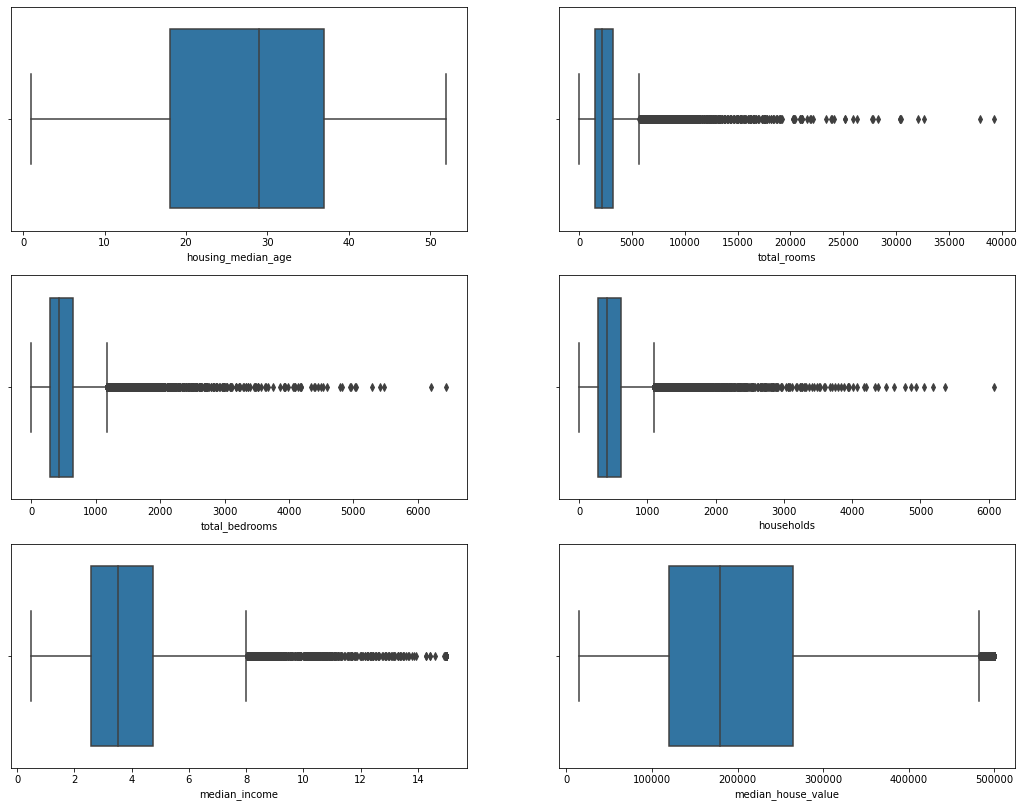

In [110]:
fig, axes = plt.subplots(3, 2, figsize=(18,14))
sns.boxplot(df1['housing_median_age'], ax=axes[0,0])
sns.boxplot(df1['total_rooms'], ax=axes[0,1])
sns.boxplot(df1['total_bedrooms'], ax=axes[1,0])
sns.boxplot(df1['households'], ax=axes[1,1])
sns.boxplot(df1['median_income'], ax=axes[2,0])
sns.boxplot(df1['median_house_value'], ax=axes[2,1])

In [111]:
#Q1 = np.percentile(df_boston['DIS'], 25,interpolation = 'midpoint')
#Q3 = np.percentile(df_boston['DIS'], 75,interpolation = 'midpoint')
#IQR = Q3 - Q1

**CORRELATION FOR GIVEN DATASET**

In [112]:
df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_code
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068831,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066147,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318710,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925723,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.068831,-0.066147,-0.318710,0.925723,1.000000,0.871989,0.972731,-0.007511,0.049406,-0.014528
population,0.099773,-0.108785,-0.296244,0.857126,0.871989,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.972731,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007511,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049406,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_code,-0.289779,0.200974,0.112468,-0.015693,-0.014528,-0.070282,-0.018186,-0.014957,0.081750,1.000000


Text(0.5, 1.0, 'Visualization of Correlation')

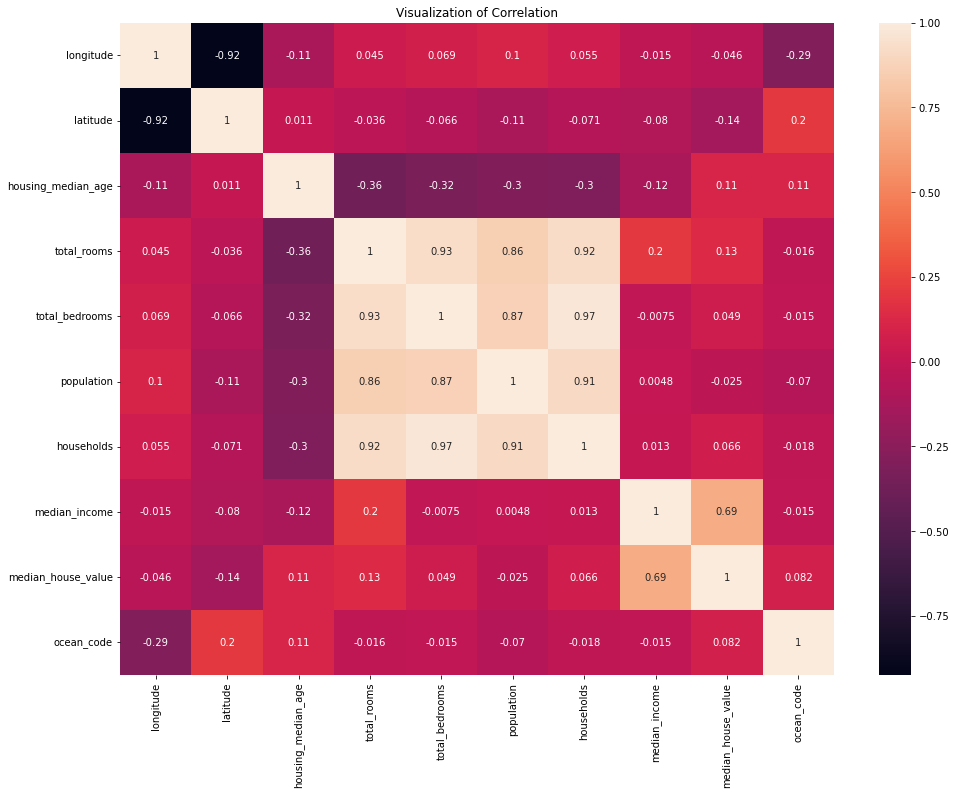

In [113]:
plt.subplots(figsize=(16,12))
sns.heatmap(df1.corr(),annot=True).set_title('Visualization of Correlation')

**STANDARDITATION OF DATASET FOR MODEL PREDICTION**

In [114]:
df1 = df1.drop(['ocean_proximity'], axis = 1)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [116]:
df_scale = scaler.fit_transform(df1)
df_scaler = pd.DataFrame(df_scale).round(5)
df_scaler = df_scaler.rename(columns = {0:'longitude',1:'latitude',2:'housing_median_age',3:'total_rooms',4:'total_bedrooms',5:'population',6:'households',7:'median_income',8:'median_house_value',9:'ocean_code'})

In [117]:
df_scaler.describe().round(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_code
count,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000,20640.00000
mean,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000
std,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002
min,-2.38599,-1.44757,-2.19618,-1.20728,-1.27198,-1.25612,-1.30398,-1.77430,-1.66264,-0.82065
25%,-1.11321,-0.79679,-0.84539,-0.54457,-0.57919,-0.56381,-0.57423,-0.68812,-0.75616,-0.82065
50%,0.53891,-0.64229,0.02865,-0.23321,-0.24827,-0.22913,-0.23682,-0.17680,-0.23533,-0.11674
75%,0.77850,0.97296,0.66431,0.23480,0.25704,0.26449,0.27584,0.45931,0.50150,-0.11674
max,2.62528,2.95807,1.85618,16.81558,14.06931,30.25033,14.60152,5.85829,2.54041,1.99500


**TRAIN AND TEST DATA SPLITTING**

In [119]:
X = df_scaler.drop(['longitude','latitude','population','median_house_value'], axis = 1)
Y = df_scaler['median_house_value']

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state =10)

**MODELLING**

**KNN ALGORITHM**

In [153]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [154]:
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

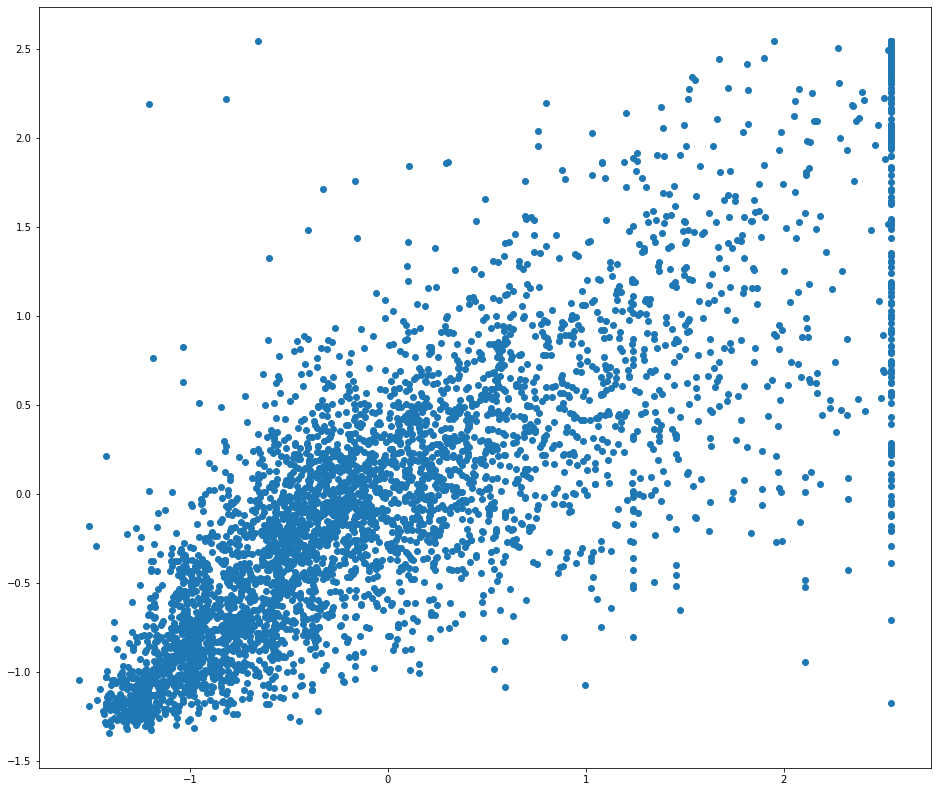

In [155]:
plt.subplots(figsize=(16,14))
plt.scatter(Y_test, Y_pred)
plt.show

In [156]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2_Score:', r2_score(Y_test, Y_pred).round(2))
Accuracy = knn_model.score(X_train,Y_train)*100
print('Accuracy score : ', Accuracy)

Mean Absolute Error: 0.41685205983527135
Mean Squared Error: 0.3618228230964004
Root Mean Squared Error: 0.6015171012501643
R2_Score: 0.65
Accuracy score :  70.82241401200972


**DECISION TREE**

Mean Absolute Error: 0.5551816182170544
Mean Squared Error: 0.6430342240078488
Root Mean Squared Error: 0.801894147632871
R2_Score: 0.37
Accuracy score :  100.0


<function matplotlib.pyplot.show(close=None, block=None)>

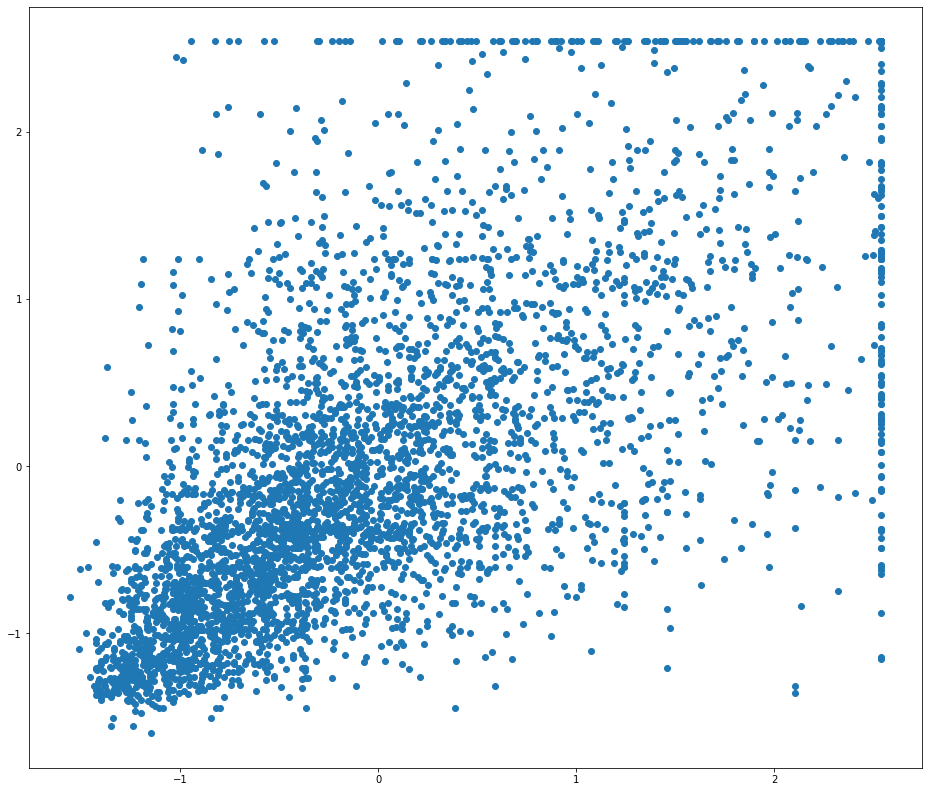

In [157]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2_Score:', r2_score(Y_test, Y_pred).round(2))
Accuracy = dt.score(X_train,Y_train)*100
print('Accuracy score : ', Accuracy)

plt.subplots(figsize=(16,14))
plt.scatter(Y_test, Y_pred)
plt.show

**LINEAR REGRESSION**

Mean Absolute Error: 0.4972972067526818
Mean Squared Error: 0.4630113475782898
Root Mean Squared Error: 0.6804493717965282
R2_Score: 0.55
Accuracy score :  54.93550740304545


<function matplotlib.pyplot.show(close=None, block=None)>

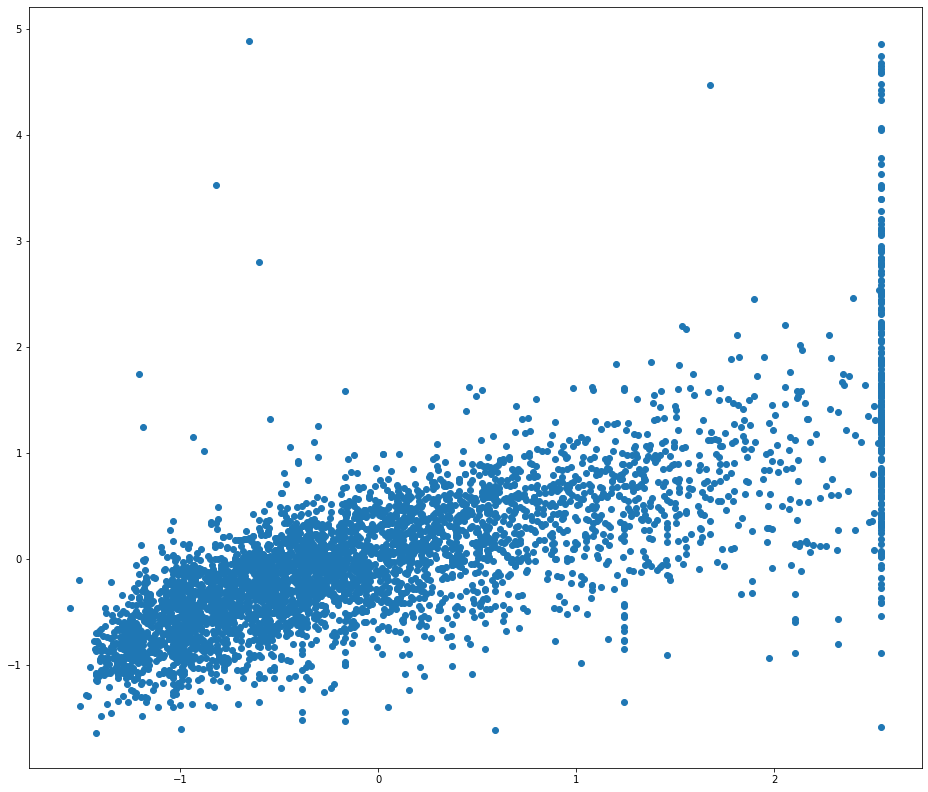

In [159]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2_Score:', r2_score(Y_test, Y_pred).round(2))
Accuracy = lr.score(X_train,Y_train)*100
print('Accuracy score : ', Accuracy)

plt.subplots(figsize=(16,14))
plt.scatter(Y_test, Y_pred)
plt.show

**RANDOM FOREST**

Mean Absolute Error: 0.4128777673934108
Mean Squared Error: 0.3438950692392144
Root Mean Squared Error: 0.5864256723909812
R2_Score: 0.66
Accuracy score :  95.19008264942812


<function matplotlib.pyplot.show(close=None, block=None)>

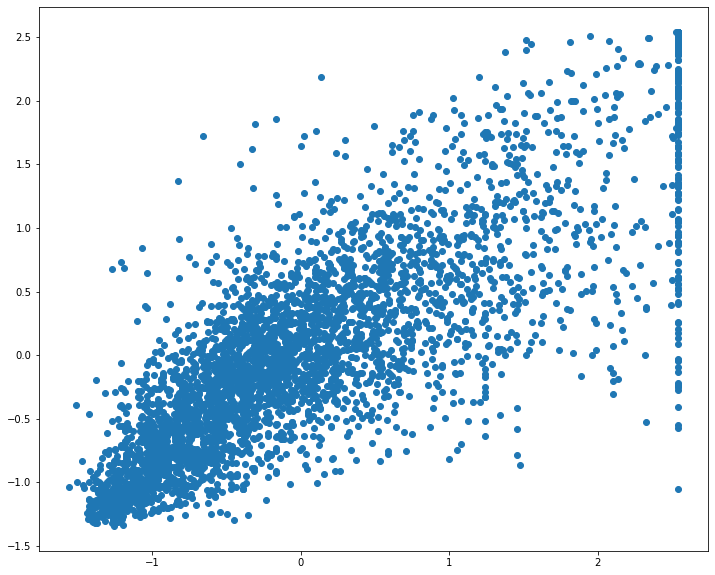

In [162]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2_Score:', r2_score(Y_test, Y_pred).round(2))
Accuracy = RF.score(X_train,Y_train)*100
print('Accuracy score : ', Accuracy)

plt.subplots(figsize=(12,10))
plt.scatter(Y_test, Y_pred)
plt.show